In [5]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
import os.path
import seaborn as sns
import matplotlib.pyplot as plt

RND_STATE = 100412

In [6]:
def load_file(file_name):
    max_bytes = 2**31 - 1
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_name)
    with open(file_name, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    return pickle.loads(bytes_in)

## Configuration

In [7]:
DATA_PICKLE = '../data/merged_data.data'

In [8]:
data = load_file(DATA_PICKLE)

## Analysis with additional data

Overall data info

In [9]:
data.describe()

,average_wind_speed,snowfall,snow_depth,thunder,dust,haze,snow,cancelled,day_of_month,day_of_week,dep_delay,diverted,month,op_carrier_fl_num,unnamed: 20,fog,hail,damaging_wind
count,14632.000000,15297.000000,15294.000000,14809.0,2204.0,14620.000000,2930.000000,15315.000000,15315.0,15315.0,15035.000000,15315.000000,15315.0,15315.000000,0.0,15315.000000,15315.000000,15315.0
mean,34.871651,0.360724,27.981431,0.0,0.0,0.360055,0.013993,0.018283,1.0,1.0,21.273030,0.002024,1.0,2526.169572,NaN,0.337120,0.002285,0.0
std,17.587445,3.634641,61.308732,0.0,0.0,0.480032,0.117482,0.133976,0.0,0.0,58.145158,0.044947,0.0,1931.813747,NaN,0.472742,0.047752,0.0
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,-25.000000,0.000000,1.0,1.000000,NaN,0.000000,0.000000,0.0
25%,22.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,-4.000000,0.000000,1.0,844.000000,NaN,0.000000,0.000000,0.0
50%,38.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.000000,0.000000,1.0,1896.000000,NaN,0.000000,0.000000,0.0
75%,42.000000,0.000000,13.000000,0.0,0.0,1.000000,0.000000,0.000000,1.0,1.0,24.000000,0.000000,1.0,4061.000000,NaN,1.000000,0.000000,0.0
max,99.000000,102.000000,610.000000,0.0,0.0,1.000000,1.000000,1.000000,1.0,1.0,1178.000000,1.000000,1.0,7439.000000,NaN,1.000000,1.000000,0.0


Correlations

In [10]:
data.corr()

,average_wind_speed,snowfall,snow_depth,thunder,dust,haze,snow,cancelled,day_of_month,day_of_week,dep_delay,diverted,month,op_carrier_fl_num,unnamed: 20,fog,hail,damaging_wind
average_wind_speed,1.000000,0.063068,-0.102023,NaN,NaN,-0.025362,0.021492,0.041671,NaN,NaN,0.018665,-0.017762,NaN,0.082520,NaN,-0.257583,0.065192,NaN
snowfall,0.063068,1.000000,0.260414,NaN,NaN,-0.049127,0.404543,0.036340,NaN,NaN,0.016479,-0.004400,NaN,0.004489,NaN,0.044069,0.029128,NaN
snow_depth,-0.102023,0.260414,1.000000,NaN,NaN,0.174611,0.101773,-0.011399,NaN,NaN,-0.003941,0.006013,NaN,0.078368,NaN,0.336395,-0.021859,NaN
thunder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
haze,-0.025362,-0.049127,0.174611,NaN,NaN,1.000000,-0.106934,-0.060283,NaN,NaN,-0.030014,0.004991,NaN,-0.109592,NaN,0.689007,-0.036745,NaN
snow,0.021492,0.404543,0.101773,NaN,NaN,-0.106934,1.000000,-0.014015,NaN,NaN,0.013376,-0.007640,NaN,0.033043,NaN,0.078559,NaN,NaN
cancelled,0.041671,0.036340,-0.011399,NaN,NaN,-0.060283,-0.014015,1.000000,NaN,NaN,0.047464,-0.006146,NaN,0.095159,NaN,-0.050925,0.064916,NaN
day_of_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def check_correlations(data_df, min_v=0.6):
    corr = data_df.corr()
    corrs = []
    for i in corr:
        for j in corr.index[corr[i] >= min_v]:
            if i != j and j not in corrs and i not in corrs:
                corrs.append(j)
                print("%s-->%s: r^2=%f" % (i,j, corr[i][corr.index == j].values[0]))
    if len(corrs) == 0:
        print('Everything is perfect')

In [12]:
check_correlations(data)

haze-->fog: r^2=0.689007


Plotting data

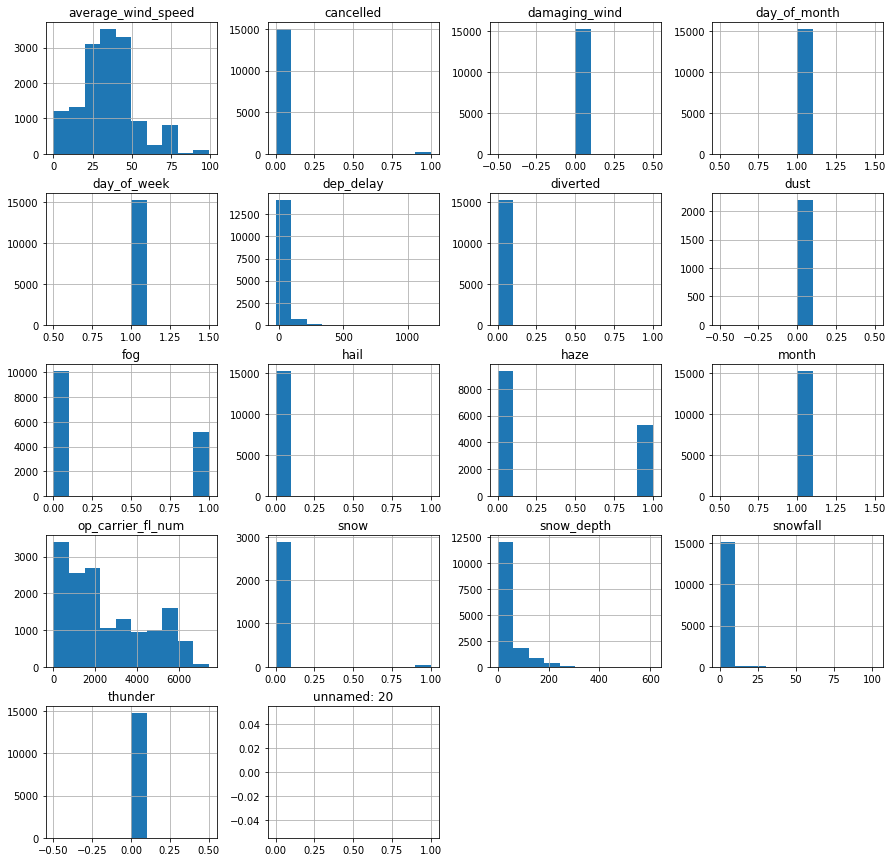

In [13]:
data.hist(figsize=(15, 15));

Plotting classes

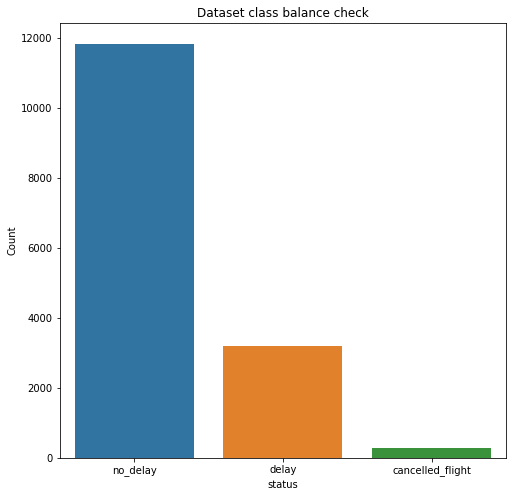

In [14]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x = data.status)
ax.set_title('Dataset class balance check')
ax.set_ylabel('Count')
plt.show()

huge imbalance here

Day / delay

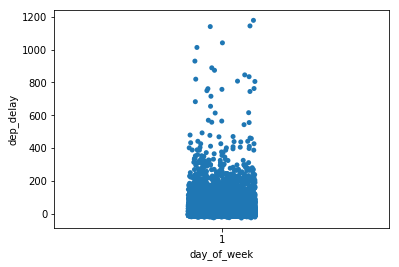

In [16]:
sns.stripplot(x="day_of_week", y="dep_delay", data=data, jitter=True)

Month / Delay

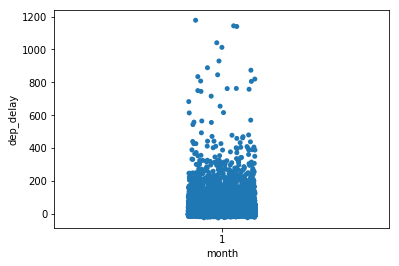

In [21]:
sns.stripplot(x="month", y="dep_delay", data=data, jitter=True)

Flights per airline

In [24]:
airlines_group = data[['status', 'op_unique_carrier']]
airlines_group_num = airlines_group.groupby(['op_unique_carrier']).size()
airlines_group = data[['status', 'op_unique_carrier']]
airlines_group = airlines_group[airlines_group['status'] != 'no_delay']
airlines_group_delays_num = airlines_group.groupby(['op_unique_carrier']).size()
delay_info = pd.DataFrame({'op_unique_carrier': np.unique(airlines_group.op_unique_carrier.values), 'Number of flights': airlines_group_num.values, 'Number of delays': airlines_group_delays_num.values})

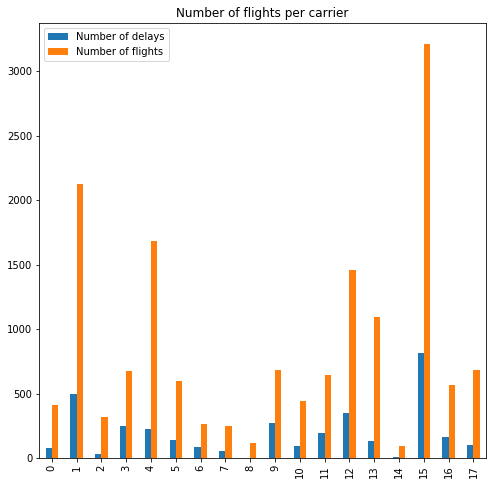

In [25]:
delay_info.plot(kind='bar', figsize=(8, 8), title = 'Number of flights per carrier')

Delay ratings

In [26]:
delay_info['Delay index'] = delay_info['Number of delays'] / delay_info['Number of flights']

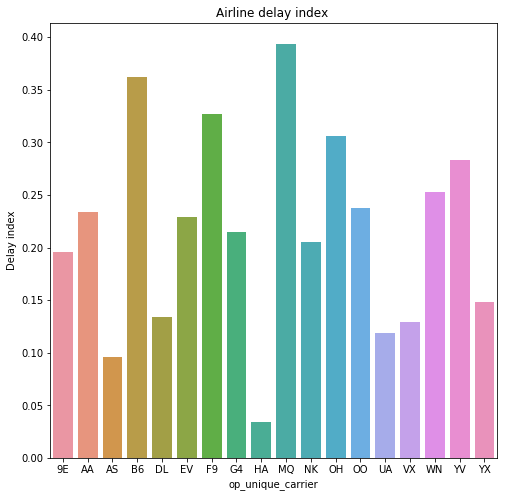

In [28]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x="op_unique_carrier", y="Delay index", data=delay_info)
ax.set_title('Airline delay index ')
plt.show()